In [76]:
# simple setting for background

%matplotlib inline
import numpy as np
import seaborn as sns
from IPython.display import HTML, display
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import warnings # Hide the warning for sns.distplot
warnings.filterwarnings('ignore') # Not suggest since it may ignore critical warning

In [2]:
# Data Loading
df_annual_sales = pd.read_csv('Data/AnnualTicketSales.csv')
df_highest_grossers = pd.read_csv('Data/HighestGrossers.csv')
df_popular_type = pd.read_csv('Data/PopularCreativeTypes.csv')
df_top_dist = pd.read_csv('Data/TopDistributors.csv')
df_top_gen = pd.read_csv('Data/TopGenres.csv')
df_top_rat = pd.read_csv('Data/TopGrossingRatings.csv')
df_top_sour = pd.read_csv('Data/TopGrossingSources.csv')
df_top_meth = pd.read_csv('Data/TopProductionMethods.csv')
df_wide_release = pd.read_csv('Data/WideReleasesCount.csv')

#### Function

In [3]:
# Remove the sign
# Need to be modified with exception for type changing
def sign_elimination(df,*sign):
    for i in range(len(sign)):
        for j in df.columns:
            if df[j].dtypes == 'object':
                df[j] = df[j].str.replace(sign[i],'')

#### Data Cleaning

##### AnnualTicketSales.csv

In [4]:
# Checking the data types and see which columns needed to be modified such as empty column and dollar sign/ comma
df_annual_sales.dtypes

YEAR                                     int64
TICKETS SOLD                            object
TOTAL BOX OFFICE                        object
TOTAL INFLATION ADJUSTED BOX OFFICE     object
AVERAGE TICKET PRICE                    object
Unnamed: 5                             float64
dtype: object

In [5]:
# Remove the empty column
df_annual_sales.drop('Unnamed: 5', axis = 1, inplace = True)

In [6]:
# Replace the comma and dollar sign between the number
sign_elimination(df_annual_sales, ',','$')

In [7]:
# All dollar sign and commas were removed
df_annual_sales.head()

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE
0,2021,423774881,3881777912,3881777912,9.16
1,2020,223638958,2048534616,2048534616,9.16
2,2019,1228541629,11253443955,11253444050,9.16
3,2018,1311536128,11948096650,12013670952,9.11
4,2017,1225639761,10993991460,11226860216,8.97


In [8]:
# Change the data to int or float
df_annual_sales['TICKETS SOLD'] = df_annual_sales['TICKETS SOLD'].astype(int)
df_annual_sales['TOTAL BOX OFFICE'] = df_annual_sales['TOTAL BOX OFFICE'].astype(int)
df_annual_sales['TOTAL INFLATION ADJUSTED BOX OFFICE'] = df_annual_sales['TOTAL INFLATION ADJUSTED BOX OFFICE'].astype(int)
df_annual_sales['AVERAGE TICKET PRICE'] = df_annual_sales['AVERAGE TICKET PRICE'].astype(float)

In [9]:
# All object variable was change and it can be used for further investigation
df_annual_sales.dtypes

YEAR                                     int64
TICKETS SOLD                             int64
TOTAL BOX OFFICE                         int64
TOTAL INFLATION ADJUSTED BOX OFFICE      int64
AVERAGE TICKET PRICE                   float64
dtype: object

##### HighestGrossers.csv

In [10]:
# Quick observation for the data set
df_highest_grossers.head()

,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD
0,1995,Batman Forever,Drama,PG-13,Warner Bros.,"$184,031,112","$387,522,978","4,23,06,002"
1,1996,Independence Day,Adventure,PG-13,20th Century Fox,"$306,169,255","$634,504,608","6,92,69,062"
2,1997,Men in Black,Adventure,PG-13,Sony Pictures,"$250,650,052","$500,207,943","5,46,07,854"
3,1998,Titanic,Adventure,PG-13,Paramount Pictures,"$443,319,081","$865,842,808","9,45,24,324"
4,1999,Star Wars Ep. I: The Phantom Menace,Adventure,PG,20th Century Fox,"$430,443,350","$776,153,749","8,47,32,942"


In [11]:
# Check for the column type
df_highest_grossers.dtypes

YEAR                      int64
MOVIE                    object
GENRE                    object
MPAA RATING              object
DISTRIBUTOR              object
TOTAL FOR YEAR           object
TOTAL IN 2019 DOLLARS    object
TICKETS SOLD             object
dtype: object

In [12]:
# Remove the comma and dollar sign for numeric values
# Make sure that the comma and dollar sign was not appeared in other column
sign_elimination(df_highest_grossers,',','$')

In [13]:
# Change the column type for numeric values
df_highest_grossers['TOTAL FOR YEAR'] = df_highest_grossers['TOTAL FOR YEAR'].astype(int)
df_highest_grossers['TOTAL IN 2019 DOLLARS'] = df_highest_grossers['TOTAL IN 2019 DOLLARS'].astype(int)
df_highest_grossers['TICKETS SOLD'] = df_highest_grossers['TICKETS SOLD'].astype(int)

In [14]:
# Make sure the column type was changed correctly
df_highest_grossers.dtypes

YEAR                      int64
MOVIE                    object
GENRE                    object
MPAA RATING              object
DISTRIBUTOR              object
TOTAL FOR YEAR            int64
TOTAL IN 2019 DOLLARS     int64
TICKETS SOLD              int64
dtype: object

In [15]:
df_highest_grossers.shape

(27, 8)

In [16]:
# Check the column with catagories
# Can be converted to function to prevent replicate workload
catagories_column = []
n = df_highest_grossers.shape[0]
for i in df_highest_grossers.columns:
    # catagories can be found if it less than the sample size
    if len(df_highest_grossers[i].unique()) < n: # Make sure it got replicate values
        catagories_column.append(i)
catagories_column # Column that needed to be encoded

['GENRE', 'MPAA RATING', 'DISTRIBUTOR']

##### PopularCreativeTypes.csv

In [18]:
# Quick observation for the data set
df_popular_type

,RANK,CREATIVE TYPES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1.0,Contemporary Fiction,"7,442","$96,203,727,036","$12,927,133",40.46%
1,2.0,Kids Fiction,564,"$32,035,539,746","$56,800,602",13.47%
2,3.0,Science Fiction,724,"$29,922,660,857","$41,329,642",12.59%
3,4.0,Fantasy,759,"$21,724,062,575","$28,621,953",9.14%
4,5.0,Super Hero,129,"$20,273,157,911","$157,156,263",8.53%
5,6.0,Historical Fiction,"1,487","$18,521,260,744","$12,455,454",7.79%
6,7.0,Dramatization,"1,175","$15,715,191,699","$13,374,631",6.61%
7,8.0,Factual,"2,467","$2,960,327,207","$1,199,970",1.25%
8,9.0,Multiple Creative Types,42,"$117,574,526","$2,799,393",0.05%
9,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Remove the null row
df_popular_type.drop(9, axis = 0, inplace= True)

In [20]:
# Remove the commas ,dollar sign and percentage sign
sign_elimination(df_popular_type,',','$','%')

In [21]:
# Check the type for data set
df_popular_type.dtypes

RANK              float64
CREATIVE TYPES     object
MOVIES             object
TOTAL GROSS        object
AVERAGE GROSS      object
MARKET SHARE       object
dtype: object

In [22]:
# Change the type for certain column
# MARKET SHARE needed to changed to float and divide by 100
df_popular_type['MOVIES'] = df_popular_type['MOVIES'].astype(int)
df_popular_type['TOTAL GROSS'] = df_popular_type['TOTAL GROSS'].astype(int)
df_popular_type['AVERAGE GROSS'] = df_popular_type['AVERAGE GROSS'].astype(int)
df_popular_type['MARKET SHARE'] = df_popular_type['MARKET SHARE'].astype(float)
df_popular_type['MARKET SHARE'] = df_popular_type['MARKET SHARE'] / 100

In [23]:
# Make sure the column types was changed correctly
df_popular_type.dtypes

RANK              float64
CREATIVE TYPES     object
MOVIES              int64
TOTAL GROSS         int64
AVERAGE GROSS       int64
MARKET SHARE      float64
dtype: object

In [24]:
# Quick check for the data set
df_popular_type.head()

,RANK,CREATIVE TYPES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1.0,Contemporary Fiction,7442,96203727036,12927133,0.4046
1,2.0,Kids Fiction,564,32035539746,56800602,0.1347
2,3.0,Science Fiction,724,29922660857,41329642,0.1259
3,4.0,Fantasy,759,21724062575,28621953,0.0914
4,5.0,Super Hero,129,20273157911,157156263,0.0853


##### TopDistributors.csv

In [25]:
# Quick observation for the data set
df_top_dist.head()

,RANK,DISTRIBUTORS,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Walt Disney,588,"$40,472,424,278","$68,830,654",17.02%
1,2,Warner Bros.,824,"$36,269,425,479","$44,016,293",15.25%
2,3,Sony Pictures,747,"$29,113,002,302","$38,973,229",12.24%
3,4,Universal,535,"$28,089,932,569","$52,504,547",11.81%
4,5,20th Century Fox,525,"$25,857,839,756","$49,253,028",10.88%


In [26]:
# Eliminate the dollar sign, commas and percentage
sign_elimination(df_top_dist,',','$','%')

In [27]:
# Make sure all the sign was removed
df_top_dist.head()

,RANK,DISTRIBUTORS,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Walt Disney,588,40472424278,68830654,17.02
1,2,Warner Bros.,824,36269425479,44016293,15.25
2,3,Sony Pictures,747,29113002302,38973229,12.24
3,4,Universal,535,28089932569,52504547,11.81
4,5,20th Century Fox,525,25857839756,49253028,10.88


In [28]:
# Check the type for each column
df_top_dist.dtypes

RANK              int64
DISTRIBUTORS     object
MOVIES            int64
TOTAL GROSS      object
AVERAGE GROSS    object
MARKET SHARE     object
dtype: object

In [29]:
# Modify the column types and convert it to floating number instead of pertage
df_top_dist['TOTAL GROSS'] = df_top_dist['TOTAL GROSS'].astype(int)
df_top_dist['AVERAGE GROSS'] = df_top_dist['AVERAGE GROSS'].astype(int)
df_top_dist['MARKET SHARE'] = df_top_dist['MARKET SHARE'].astype(float) / 100

In [30]:
# final check for the data set
df_top_dist.head()

,RANK,DISTRIBUTORS,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Walt Disney,588,40472424278,68830654,0.1702
1,2,Warner Bros.,824,36269425479,44016293,0.1525
2,3,Sony Pictures,747,29113002302,38973229,0.1224
3,4,Universal,535,28089932569,52504547,0.1181
4,5,20th Century Fox,525,25857839756,49253028,0.1088


##### TopGenres.csv

In [31]:
# Quick review of the data set
df_top_gen

,RANK,GENRES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Adventure,"1,102","$64,529,536,530","$58,556,748",27.14%
1,2,Action,"1,098","$49,339,974,493","$44,936,224",20.75%
2,3,Drama,"5,479","$35,586,177,269","$6,495,013",14.97%
3,4,Comedy,"2,418","$33,687,992,318","$13,932,172",14.17%
4,5,Thriller/Suspense,"1,186","$19,810,201,102","$16,703,374",8.33%
5,6,Horror,716,"$13,430,378,699","$18,757,512",5.65%
6,7,Romantic Comedy,630,"$10,480,124,374","$16,635,118",4.41%
7,8,Musical,201,"$4,293,988,317","$21,363,126",1.81%
8,9,Documentary,"2,415","$2,519,513,142","$1,043,277",1.06%
9,10,Black Comedy,213,"$2,185,433,323","$10,260,250",0.92%


In [32]:
# Remove the commas, dollar sign and percentage
sign_elimination(df_top_gen, ',','$','%')

In [33]:
# Check the type for the data set
df_top_gen.dtypes

RANK              int64
GENRES           object
MOVIES           object
TOTAL GROSS      object
AVERAGE GROSS    object
MARKET SHARE     object
dtype: object

In [34]:
# Change the type for centain columns
df_top_gen['MOVIES'] = df_top_gen['MOVIES'].astype(int)
df_top_gen['TOTAL GROSS'] = df_top_gen['TOTAL GROSS'].astype(int)
df_top_gen['AVERAGE GROSS'] = df_top_gen['AVERAGE GROSS'].astype(int)
df_top_gen['MARKET SHARE'] = df_top_gen['MARKET SHARE'].astype(float) / 100

In [35]:
# Double check the date set and data type
df_top_gen.head()

,RANK,GENRES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Adventure,1102,64529536530,58556748,0.2714
1,2,Action,1098,49339974493,44936224,0.2075
2,3,Drama,5479,35586177269,6495013,0.1497
3,4,Comedy,2418,33687992318,13932172,0.1417
4,5,Thriller/Suspense,1186,19810201102,16703374,0.0833


In [36]:
df_top_gen.dtypes

RANK               int64
GENRES            object
MOVIES             int64
TOTAL GROSS        int64
AVERAGE GROSS      int64
MARKET SHARE     float64
dtype: object

##### TopGrossingRatings.csv

In [37]:
# Quick review for the data set
df_top_rat

,RANK,MPAA RATINGS,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,PG-13,"3,243","$113,524,789,243","$35,006,102",47.75%
1,2,R,"5,480","$63,497,164,978","$11,587,074",26.71%
2,3,PG,"1,535","$49,124,317,794","$32,002,813",20.66%
3,4,G,395,"$9,572,240,391","$24,233,520",4.03%
4,5,Not Rated,"5,820","$1,918,358,283","$329,615",0.81%
5,6,NC-17,24,"$44,850,139","$1,868,756",0.02%
6,7,Open,5,"$5,489,687","$1,097,937",0.00%
7,8,GP,7,"$552,618","$78,945",0.00%


In [38]:
# Remove the commas, dollar sign and percentage
sign_elimination(df_top_rat, ',','$','%')

In [39]:
# Check the data type for each columns.
df_top_rat.dtypes

RANK              int64
MPAA RATINGS     object
MOVIES           object
TOTAL GROSS      object
AVERAGE GROSS    object
MARKET SHARE     object
dtype: object

In [40]:
# Change the data type for each column
df_top_rat['MOVIES'] = df_top_rat['MOVIES'].astype(int)
df_top_rat['TOTAL GROSS'] = df_top_rat['TOTAL GROSS'].astype(int)
df_top_rat['AVERAGE GROSS'] = df_top_rat['AVERAGE GROSS'].astype(int)
df_top_rat['MARKET SHARE'] = df_top_rat['MARKET SHARE'].astype(float) / 100

In [41]:
# Double check for the data set and columns type
df_top_rat

,RANK,MPAA RATINGS,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,PG-13,3243,113524789243,35006102,0.4775
1,2,R,5480,63497164978,11587074,0.2671
2,3,PG,1535,49124317794,32002813,0.2066
3,4,G,395,9572240391,24233520,0.0403
4,5,Not Rated,5820,1918358283,329615,0.0081
5,6,NC-17,24,44850139,1868756,0.0002
6,7,Open,5,5489687,1097937,0.0000
7,8,GP,7,552618,78945,0.0000


In [42]:
df_top_rat.dtypes

RANK               int64
MPAA RATINGS      object
MOVIES             int64
TOTAL GROSS        int64
AVERAGE GROSS      int64
MARKET SHARE     float64
dtype: object

##### TopGrossingSources.csv

In [43]:
# Quick review for the data set
df_top_sour

,RANK,SOURCES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Original Screenplay,"7,946","$106,375,196,782","$13,387,264",44.74%
1,2,Based on Fiction Book/Short Story,"2,150","$47,005,613,207","$21,863,076",19.77%
2,3,Based on Comic/Graphic Novel,249,"$23,369,989,130","$93,855,378",9.83%
3,4,Remake,328,"$12,832,659,970","$39,123,963",5.40%
4,5,Based on Real Life Events,"3,225","$11,398,356,297","$3,534,374",4.79%
5,6,Based on TV,231,"$11,305,006,312","$48,939,421",4.75%
6,7,Based on Factual Book/Article,295,"$7,443,681,990","$25,232,820",3.13%
7,8,Spin-Off,41,"$3,833,128,331","$93,490,935",1.61%
8,9,Based on Folk Tale/Legend/Fairytale,78,"$3,406,118,495","$43,668,186",1.43%
9,10,Based on Play,271,"$2,111,190,923","$7,790,372",0.89%


In [44]:
# Remove the commas, dollar sign and percentage
sign_elimination(df_top_sour, ',','$','%')

In [45]:
# Check the data type
df_top_sour.dtypes

RANK              int64
SOURCES          object
MOVIES           object
TOTAL GROSS      object
AVERAGE GROSS    object
MARKET SHARE     object
dtype: object

In [46]:
# Change the data type for those modified columns
df_top_sour['MOVIES'] = df_top_sour['MOVIES'].astype(int)
df_top_sour['TOTAL GROSS'] = df_top_sour['TOTAL GROSS'].astype(int)
df_top_sour['AVERAGE GROSS'] = df_top_sour['AVERAGE GROSS'].astype(int)
df_top_sour['MARKET SHARE'] = df_top_sour['MARKET SHARE'].astype(float) / 100

In [47]:
# Final check for the date set and columns type
df_top_sour

,RANK,SOURCES,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Original Screenplay,7946,106375196782,13387264,0.4474
1,2,Based on Fiction Book/Short Story,2150,47005613207,21863076,0.1977
2,3,Based on Comic/Graphic Novel,249,23369989130,93855378,0.0983
3,4,Remake,328,12832659970,39123963,0.0540
4,5,Based on Real Life Events,3225,11398356297,3534374,0.0479
5,6,Based on TV,231,11305006312,48939421,0.0475
6,7,Based on Factual Book/Article,295,7443681990,25232820,0.0313
7,8,Spin-Off,41,3833128331,93490935,0.0161
8,9,Based on Folk Tale/Legend/Fairytale,78,3406118495,43668186,0.0143
9,10,Based on Play,271,2111190923,7790372,0.0089


In [48]:
df_top_sour.dtypes

RANK               int64
SOURCES           object
MOVIES             int64
TOTAL GROSS        int64
AVERAGE GROSS      int64
MARKET SHARE     float64
dtype: object

##### TopProductionMethods.csv

In [49]:
# Quick review for the data set
df_top_meth

,RANK,PRODUCTION METHODS,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Live Action,"14,613","$179,637,201,848","$12,292,972",75.56%
1,2,Animation/Live Action,264,"$30,346,622,254","$114,949,327",12.76%
2,3,Digital Animation,365,"$23,920,180,508","$65,534,741",10.06%
3,4,Hand Animation,164,"$2,960,497,487","$18,051,814",1.25%
4,5,Stop-Motion Animation,37,"$676,490,120","$18,283,517",0.28%
5,6,Multiple Production Methods,26,"$43,728,300","$1,681,858",0.02%
6,7,Rotoscoping,4,"$8,468,385","$2,117,096",0.00%


In [50]:
# Remove the dollar sign, commas and percentage
sign_elimination(df_top_meth, ',','$','%')

In [51]:
# Check the columns type
df_top_meth.dtypes

RANK                   int64
PRODUCTION METHODS    object
MOVIES                object
TOTAL GROSS           object
AVERAGE GROSS         object
MARKET SHARE          object
dtype: object

In [52]:
# Change the column type for modified columns
df_top_meth['MOVIES'] = df_top_meth['MOVIES'].astype(int)
df_top_meth['TOTAL GROSS'] = df_top_meth['TOTAL GROSS'].astype(int)
df_top_meth['AVERAGE GROSS'] = df_top_meth['AVERAGE GROSS'].astype(int)
df_top_meth['MARKET SHARE'] = df_top_meth['MARKET SHARE'].astype(float) / 100

In [53]:
# Final check for the date set and columns type
df_top_meth

,RANK,PRODUCTION METHODS,MOVIES,TOTAL GROSS,AVERAGE GROSS,MARKET SHARE
0,1,Live Action,14613,179637201848,12292972,0.7556
1,2,Animation/Live Action,264,30346622254,114949327,0.1276
2,3,Digital Animation,365,23920180508,65534741,0.1006
3,4,Hand Animation,164,2960497487,18051814,0.0125
4,5,Stop-Motion Animation,37,676490120,18283517,0.0028
5,6,Multiple Production Methods,26,43728300,1681858,0.0002
6,7,Rotoscoping,4,8468385,2117096,0.0000


In [54]:
df_top_meth.dtypes

RANK                    int64
PRODUCTION METHODS     object
MOVIES                  int64
TOTAL GROSS             int64
AVERAGE GROSS           int64
MARKET SHARE          float64
dtype: object

##### WideReleasesCount.csv

In [55]:
df_wide_release.head()

,YEAR,WARNER BROS,WALT DISNEY,20TH CENTURY FOX,PARAMOUNT PICTURES,SONY PICTURES,UNIVERSAL,TOTAL MAJOR 6,TOTAL OTHER STUDIOS,Unnamed: 9
0,2021,17,7,0,4,16,17,61,38,NaN
1,2020,5,3,1,3,9,13,34,23,NaN
2,2019,18,10,11,9,18,21,87,44,NaN
3,2018,19,10,11,10,16,20,86,58,NaN
4,2017,18,8,14,10,16,15,81,50,NaN


In [56]:
# Remove the unknow columns
df_wide_release.drop('Unnamed: 9', axis = 1, inplace = True)

In [57]:
# Check the column type
df_wide_release.dtypes

YEAR                   int64
WARNER BROS            int64
WALT DISNEY            int64
20TH CENTURY FOX       int64
PARAMOUNT PICTURES     int64
SONY PICTURES          int64
UNIVERSAL              int64
TOTAL MAJOR 6          int64
TOTAL OTHER STUDIOS    int64
dtype: object

There is no further cleaning for this data set.
We can strat the extract data from this data set with the top distributor data set
since we found some relationship for distributor name in both data set.

##### Data analysis

In [58]:
# Create a new data frame and merge annual_sales and highest grossers in the column YEAR
df1 = df_annual_sales
# as: annual sales dataframe, hg = highest grosser dataframe
df1 = df1.merge(df_highest_grossers, how = 'left', on = 'YEAR', suffixes =('_as','_hg'))

In [59]:
df1

,YEAR,TICKETS SOLD_as,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD_hg
0,2021,423774881,3881777912,3881777912,9.16,Shang-Chi and the Legend of the Ten Rings,NaN,PG-13,Walt Disney,224226704,224226704,24478897
1,2020,223638958,2048534616,2048534616,9.16,Bad Boys For Life,NaN,R,Sony Pictures,204417855,204417848,22316359
2,2019,1228541629,11253443955,11253444050,9.16,Avengers: Endgame,NaN,PG-13,Walt Disney,858373000,858373002,93708843
3,2018,1311536128,11948096650,12013670952,9.11,Black Panther,Action,PG-13,Walt Disney,700059566,703901821,76845177
4,2017,1225639761,10993991460,11226860216,8.97,Star Wars Ep. VIII: The Last Jedi,Action,PG-13,Walt Disney,517218368,528173936,57660910
5,2016,1302556378,11267115924,11931416424,8.65,Finding Dory,Action,PG,Walt Disney,486295561,514967322,56219140
6,2015,1323356776,11155900636,12121948075,8.43,Star Wars Ep. VII: The Force Awakens,Action,PG-13,Walt Disney,742208942,806480887,88043765
7,2014,1257402920,10272985008,11517810744,8.17,Guardians of the Galaxy,Adventure,PG-13,Walt Disney,333055258,373413235,40765637
8,2013,1339168926,10887446341,12266787382,8.13,Iron Man 3,Adventure,PG-13,Walt Disney,408992272,460808016,50306552
9,2012,1380921942,10992141616,12649244986,7.96,The Avengers,Adventure,PG-13,Walt Disney,623357910,717331462,78311295


First, we can look at the value according to the year and check with any pattern or observation

In [60]:
# Obtain all the variable that can be shown as numeric value
quantativity = [i for i in df1.columns if df1[i].dtype != 'object' and i != 'YEAR']
quantativity 

['TICKETS SOLD_as',
 'TOTAL BOX OFFICE',
 'TOTAL INFLATION ADJUSTED BOX OFFICE',
 'AVERAGE TICKET PRICE',
 'TOTAL FOR YEAR',
 'TOTAL IN 2019 DOLLARS',
 'TICKETS SOLD_hg']

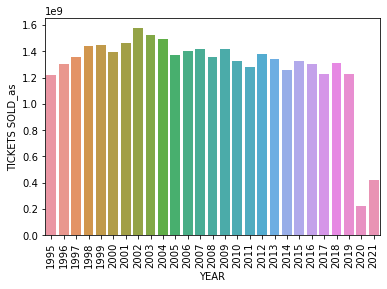

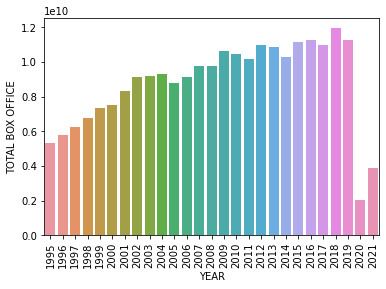

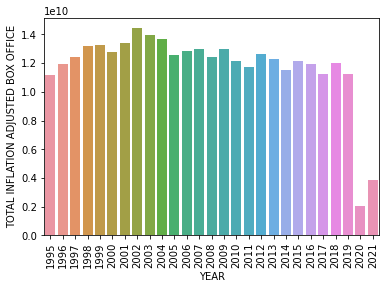

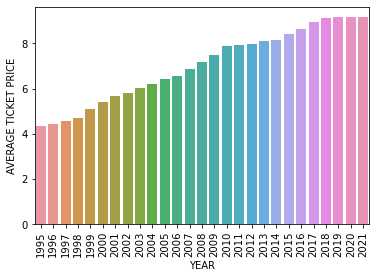

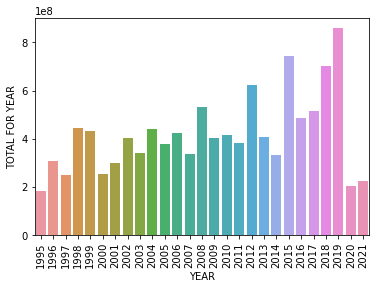

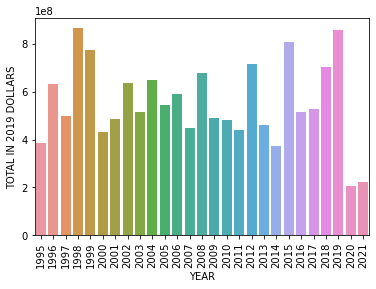

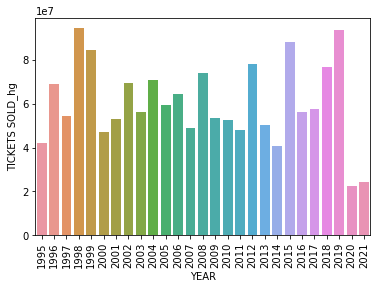

In [61]:
# Next step is that trying to find a way to using the map function or Facegrid for better comparison
for i in range(len(quantativity)):
    plt.figure(i+1) # Simple way to assign the location of the plot
    # Generate a barchart for observation for each variable against YEAR
    sns.barplot(data = df1, x = 'YEAR', y = quantativity[i])
    x = plt.xticks(rotation = 90) # avoid the overlap of YEAR variables

There is some observation and trend that we can observe. First, the average ticket price is increasing according to the year and it may due to the cost of movie, theater and inflation. Also, the total box office is keep increasing as well but it is quite steady or decreased a little after the inflation adjustment. The total ticket amount increase slightly from 1995 but start to reduce after 2004. It can be due to some movie stream platform such as NetFlix was getting popular. People tend to wait and watch the movie on those platform instead of paying for movie ticket.

One outstanding point is that the amount of sold ticket is dropped dramatically in 2020 since the outbreak is happened at the end of 2019. People tend to stay at home and not going to any crown location. Therefore, the sold ticker amount is dropped but the price ticket is still increasing.

##### Catagories part for top grossier

Let's move to some catagories variables for other observation that we can have

In [62]:
qualitative = [i for i in df1.columns if df1[i].dtypes == 'object']
qualitative

['MOVIE', 'GENRE', 'MPAA RATING', 'DISTRIBUTOR']

In [63]:
df1[['MOVIE', 'DISTRIBUTOR']]

,MOVIE,DISTRIBUTOR
0,Shang-Chi and the Legend of the Ten Rings,Walt Disney
1,Bad Boys For Life,Sony Pictures
2,Avengers: Endgame,Walt Disney
3,Black Panther,Walt Disney
4,Star Wars Ep. VIII: The Last Jedi,Walt Disney
5,Finding Dory,Walt Disney
6,Star Wars Ep. VII: The Force Awakens,Walt Disney
7,Guardians of the Galaxy,Walt Disney
8,Iron Man 3,Walt Disney
9,The Avengers,Walt Disney


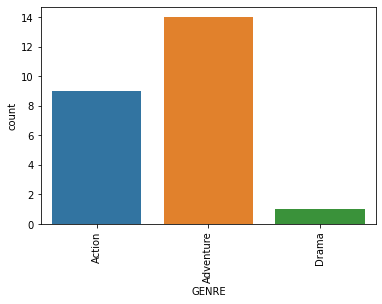

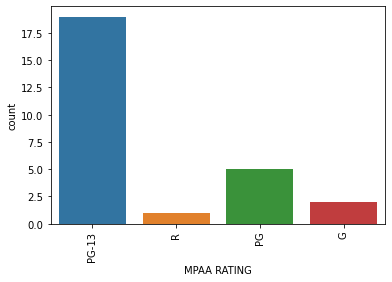

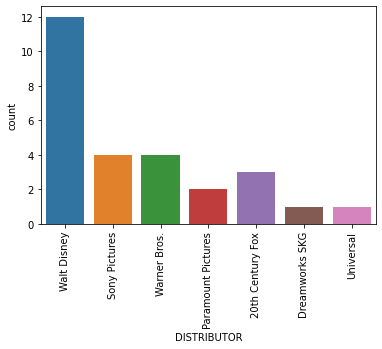

In [64]:
# Generate the count plot for each catagories except MOVIE column
for i in range(1, len(qualitative)):
    plt.figure(i)
    sns.countplot(data = df1, x = qualitative[i])
    x = plt.xticks(rotation = 90)

Wait Disney got the highest amount of top grossier movie since 1995 especially recent year since Wait Disney have bought the right for Marvel. Marvel is trendy series started from Iron Man. People more like the action, adventure and sci-fi movie. Also, most of the highest grosser movie was catagorized as PG-13 and it include the largest aga group. Therefore, the rating won't supress the box office of these new trend movie

##### Encode dataframe & check with the correlation

In [80]:
from sklearn.preprocessing import OrdinalEncoder

In [81]:
catagories_column

['GENRE', 'MPAA RATING', 'DISTRIBUTOR']

There are some missing value for the GENRE for some highest grosser movie and we should refill by checking the genre of it through internet

In [93]:
# Shang-Chi
df1.loc[0,'GENRE'] = 'Action'
# Bad Boys for life
df1.loc[1,'GENRE'] = 'Action'
# Avergers: End Games
df1.loc[2,'GENRE'] = 'Action'

In [94]:
ordianl_encoder = OrdinalEncoder()
df1[catagories_column] = ordianl_encoder.fit_transform(df1[catagories_column])

In [96]:
# Encode for the genre, MPAA rating and the distributor
df1.head()

,YEAR,TICKETS SOLD_as,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD_hg
0,2021,423774881,3881777912,3881777912,9.16,Shang-Chi and the Legend of the Ten Rings,0.0,2.0,5.0,224226704,224226704,24478897
1,2020,223638958,2048534616,2048534616,9.16,Bad Boys For Life,0.0,3.0,3.0,204417855,204417848,22316359
2,2019,1228541629,11253443955,11253444050,9.16,Avengers: Endgame,0.0,2.0,5.0,858373000,858373002,93708843
3,2018,1311536128,11948096650,12013670952,9.11,Black Panther,0.0,2.0,5.0,700059566,703901821,76845177
4,2017,1225639761,10993991460,11226860216,8.97,Star Wars Ep. VIII: The Last Jedi,0.0,2.0,5.0,517218368,528173936,57660910


In [99]:
# Try to get rid of the YEAR and MOVIE columns
df1_corr = df1
df1_corr.drop(['YEAR', 'MOVIE'], axis = 1, inplace = True)

<AxesSubplot:>

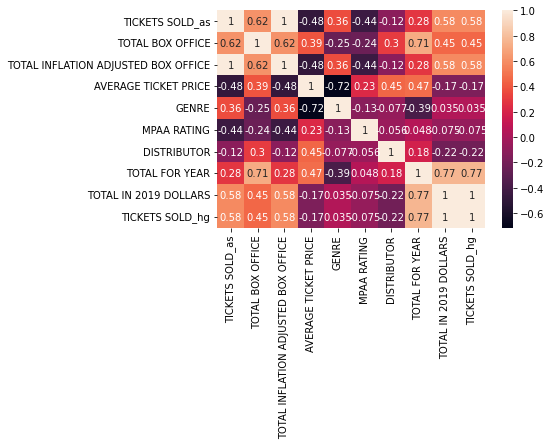

In [104]:
# Get the correlation value for the whole graph and generate a heatmap
corr = df1_corr.corr()
sns.heatmap(corr, annot= True)
# It will be choatic to observe the merged dataset
# Also, it can be merged with other date set for more insight
# It seems that there is no meaning for having the correlation

In [105]:
# Next plan: look for a target variable for prediction, TICKET? or TOTAL?
# Hard to find relation for each dataset or we can just simply analyse each data set?
# Ranking can be another direction